                 # Atividade - Análise de Dados - Regressão Linear#

                                # 1T Zamith #


In [13]:
import pandas as pd # importando Data Frame onde vou utilizar meu aquivo .txt
import matplotlib.pyplot as plt # lib importantíssima para plotagem dos gráficos da atividade
import numpy as np  # lib matemática do python
%matplotlib inline  # graficos mantidos na tela

1) Importando o arquivo do Google Class ,conferi que não era "Common Separate Values",pelo contrário, estava espaçado com "tab" , utilizei um editor de texto comum e o deixei certinho.

2) Dados com "virgula" são interpretados como "tuple" e não "floats", também foi necessário alterar ,por mais que nao seja da boa prática Data Scientist =)

In [25]:
df=pd.read_csv("/Users/thiagozamith/Desktop/dados_fixed.txt") # importando o arquivo
print(df) # amostrando dados organizados
x=df[["X"]] 
y=df[["Y"]]
x_=np.array(x)
y_=np.array(y)


           X          Y
0   0.929940   8.686152
1   0.715245   7.802856
2   0.245983   6.407552
3   0.259103   6.430971
4   0.330882   6.582455
5   0.888677   8.507032
6   0.252772   6.419481
7   0.456939   6.919751
8   0.358673   6.649966
9   0.806228   8.162231
10  0.954174   8.793342
11  0.208679   6.350105
12  0.340969   6.606453
13  0.284098   6.583179
14  0.939314  10.438519
15  0.181226   6.357095
16  0.506240   7.456659
17  0.643570   8.217036
18  0.678521   8.437165
19  0.959191  10.618266
20  0.487461   7.365511
21  0.060737   6.406358
22  0.549636   7.679079
23  0.563661   7.754474
24  0.226266   6.438155
25  0.202052   6.390592
26  0.399393   6.979518
27  0.842181   9.617005
28  0.190848   6.371653
29  0.745544   8.890228
30  0.045292   6.484050
31  0.756298   8.966768
32  0.143611   6.317855
33  0.048796   6.462881


In [11]:
df.columns # verificando se realmente estou com 2 colunas , index = X e Y corretos.

Index(['X', 'Y'], dtype='object')

                     EXPLORANDO  MEU  DATASET

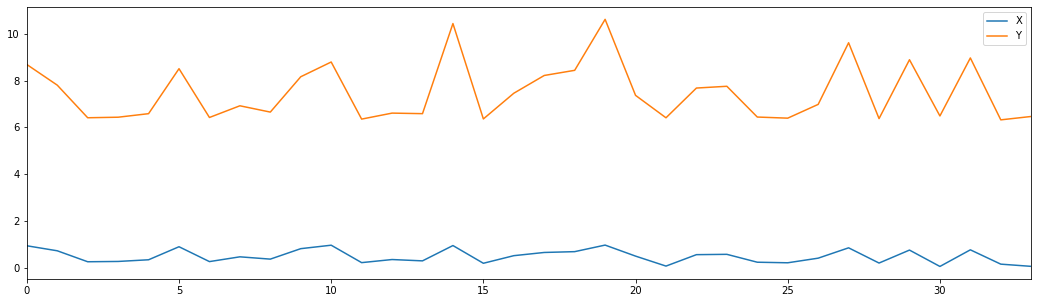

In [13]:
df.plot(figsize=(18,5)) # visualizacao primaria de dados com pandas

3) Inspecionando o gráfico vemos que : 
    * y cresce a medida que x cresce.
    
    * Y pode assumir valor  tal que seja y=(alfa)*x + beta + erro , continuaremos                 explorando...

In [16]:
 k = df["Y"]/df["X"] # verificando a chance de termos y=xˆn , quadrado perfeito ..cubo
                     #nota-se que nao é valido a hipotese temos um valor diferente para cada ponto...seguiremos inspecionando.
 print(k)

0       9.340555
1      10.909346
2      26.048723
3      24.820119
4      19.893686
5       9.572698
6      25.396312
7      15.143716
8      18.540487
9      10.123970
10      9.215660
11     30.430056
12     19.375500
13     23.172226
14     11.112918
15     35.078268
16     14.729500
17     12.767892
18     12.434643
19     11.070020
20     15.109938
21    105.476297
22     13.971198
23     13.757343
24     28.453958
25     31.628405
26     17.475304
27     11.419172
28     33.386068
29     11.924490
30    143.160769
31     11.856128
32     43.992950
33    132.446273
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c24c16a10>,
      dtype=object)

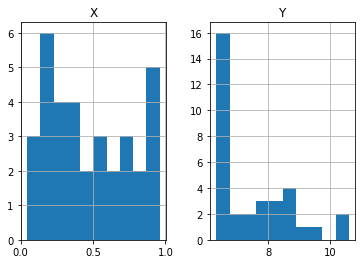

In [50]:
df.hist() #interessante analisar como histograma, uma vez que podemos ter caracteristicas "normal" nos dados ,nao vem ao caso para esses dados.

                     VALIDANDO UMA RELAÇÃO LINEAR ENTRE X E Y

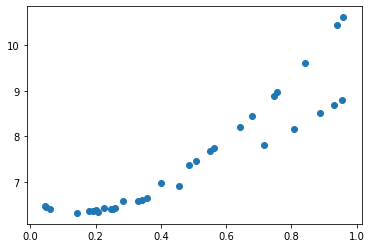

In [18]:
plt.scatter(df["X"], df["Y"]) # Nada melhor que um grafico de dispersao para melhor inspecionarmos 

4) Logo observamos que temos correlação positiva se aproximando duma curva parabólica ...cabe    a nós acharmos uma equação que melhor se aproxime para essa distribuição...


In [19]:
from sklearn.linear_model import LinearRegression # lib poderosa do python para tratar de regressões lineares

                               REGRESSÃO LINEAR SIMPLES
                                         RLS

                                       PARTE I
                                
         Seja Y =β +βX +βX2+ε , no caso de maneira  genérica, uma regressao polinomial, onde 
         1) β0, β1 e β2 serao meus estimadores a serem calculados
         2) Xi minha variavel independente ;Y variavel dependente(preditora)
         3) ε(erro) é a variavel aleatoria normalmente distribuida , E(ε)=0
     
                                       PARTE II 
                                
          O erro esta relacionado a distancia entre o valor observado e valor estimado tal que :
     nn
              SIGMA(εi2) =  SIGMA[Yi − β0 − β1Xi − ..βnXiˆn]2 --> METODO DOS MINIMOS QUADRADOS
              i=1 i=1
      
                    Chegamos a:   Yˆ = βˆ + βˆ X + ....βˆ X ˆn
  

In [1]:
from sklearn.datasets import load_diabetes          #importando as libs necessarias 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [28]:
# criar modelo linear e otimizar
lm_model = LinearRegression()
lm_model.fit(x_, y_)
# extrair coeficientes
alfa = lm_model.coef_         # Caso ajustassemos para Yˆ=βˆ + β1 * x # uma reta #
beta = lm_model.intercept_


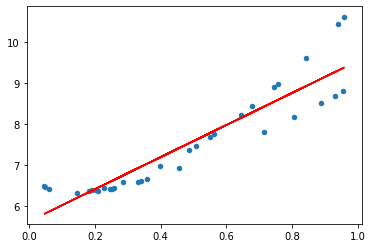

In [35]:
# plotar pontos e retas com parâmetros otimizados
plt.scatter(x_, y_,s=20)
plt.plot(x_, (x_ * alfa + beta), color='r')

plt.show()


                                  #CONCLUSÃO#
                           
                           
                           
                           VISUALISANDO ESTATÍSTICAS
                            
                       Avaliando o Modelo de Regressão Linear
                       
                       
       Teste F de Significância global: afirma se ao menos uma variável do meu modelo está            relacionada com a variável alvo. Para isso, o valor-p desta estatística precisa ser            menor que 0.05.
       
       Teste de Significância individuais ou p-values dos coeficientes: diz o quanto das              variáveis preditoras explicam a variável alvo. A métrica padrão é o p-value ser menor           que 0.05.
       
       Coeficiente R²: diz o quanto o meu modelo explica seus resultados. É um valor entre 0 e        1. Quanto mais próximo de 1, melhor.

       Entendendo o cálculo do R²
       
       O R², também chamado de Coeficiente de Determinação, diz o quanto meu modelo está              prevendo corretamente. O cálculo dele, envolve três medidas:
       Soma Total dos Quadrados (STQ): mostra a variação de y em torno da própria média. É o          somatório das diferenças entre o valor alvo real e sua média elevado ao quadrado.

    
       Soma dos Quadrados dos Resíduos (SQU): variação de Y que não é explicada pelo modelo          elaborado. É o somatório das diferenças entre o valor predito e o valor real elevados          ao quadrado.


       Soma dos Quadrados de Regressão (SQR): oferece a variação de Y considerando as                variáveis X utilizadas no modelo. É a diferença entre o valor de SQT e SQU. Portanto:          SQR = SQT — SQU
       
       O valor de R² é o próprio SQR dividido pelo SQT, ou seja, é divisão da variação                explicada pelo variação total dos dados.



In [49]:
import statsmodels.api as sm # lib estatistica

# é necessário adicionar uma constante a matriz X
x_sm = sm.add_constant(x)
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results = sm.OLS(y, x_sm).fit()
# mostrando as estatísticas do modelo
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     187.9
Date:                Tue, 24 Mar 2020   Prob (F-statistic):           6.11e-15
Time:                        14:46:36   Log-Likelihood:                -22.483
No. Observations:                  34   AIC:                             48.97
Df Residuals:                      32   BIC:                             52.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6213      0.159     35.277      0.000       5.297       5.946
X              3.9146      0.286     13.706      0.000       3.333       4.496
==============================================================================
Omnibus:                        6.371   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                5.151
Skew:                           0.933   Prob(JB):                       0.0761
Kurtosis:                       3.394   Cond. No.                         4.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                                   RESULTADOS OBTIDOS
       
       O que nos interessa aqui são o R-squared, o F-statistic juntamente com Prob (F-                statistic), a coluna coef (os coeficientes) e a coluna P > [t] , que são os p-values          para cada coeficiente.
       
       Logo,  concluimos que :
       
       alfa=3.9146
       
       beta=5.6213
       
       Rˆ2=0.854 ---> infere-se que o modelo explica bem os resultados, boa correlação entre          os dados.
       
      Prob F e p[t] < 0.05 ---> dentro da métrica e estatística padrão,boa correlação entre          os dados.
      
      FIM =)
       
       
       
       

In [ ]:
result.r-